In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
import os 

In [6]:
os.chdir("C://Users//sandY//Downloads")

In [7]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv") 
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train.shape,test.shape

((614, 13), (367, 12))

In [ ]:
train_original=train.copy() 
test_original=test.copy()

# hypo generations

 #1. Salary: Applicants with high income should have more chances of loan approval.
 #2. Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
 #3. Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval   #should be high.
 #4. Loan term: Loan for less time period and less amount should have higher chances of approval.
 #5. EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
#int64: It represents the integer variables. ApplicantIncome is of this format.
#float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

In [12]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#UNIVARIATE ANALYSYS OF DATA 

In [14]:
# TARGET VARIABLE HERE OUR TARGET VARIABLE IS LOAN STATUS SO LETS SEE ITS DESCRIPTIVE PART

In [16]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

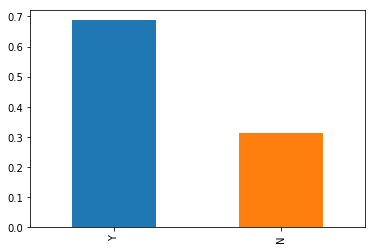

In [19]:
train["Loan_Status"].value_counts(normalize=True).plot(kind="bar")
train["Loan_Status"].value_counts(normalize=True)

In [20]:
# lets visualize each variable seperately

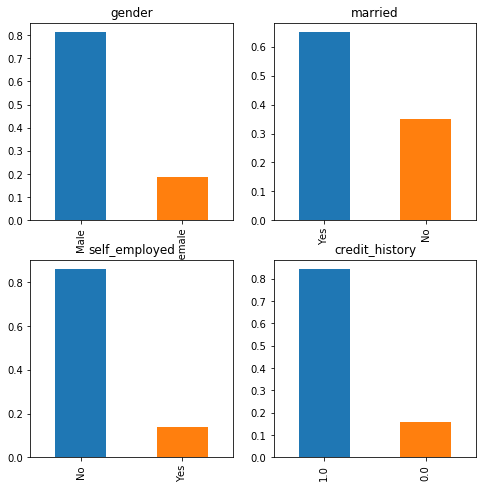

In [35]:
plt.subplot(2,2,1)
train["Gender"].value_counts(normalize=True).plot(kind="bar",figsize=(8,8),title="gender")
train["Gender"].value_counts(normalize=True)


plt.subplot(2,2,2)
train["Married"].value_counts(normalize=True).plot(kind="bar",figsize=(8,8),title="married")
train["Married"].value_counts(normalize=True)

plt.subplot(2,2,3)
train["Self_Employed"].value_counts(normalize=True).plot(kind="bar",figsize=(8,8),title="self_employed")

plt.subplot(2,2,4)
train["Credit_History"].value_counts(normalize=True).plot(kind="bar",figsize=(8,8),title="credit_history")

# Independent Variable (Ordinal)

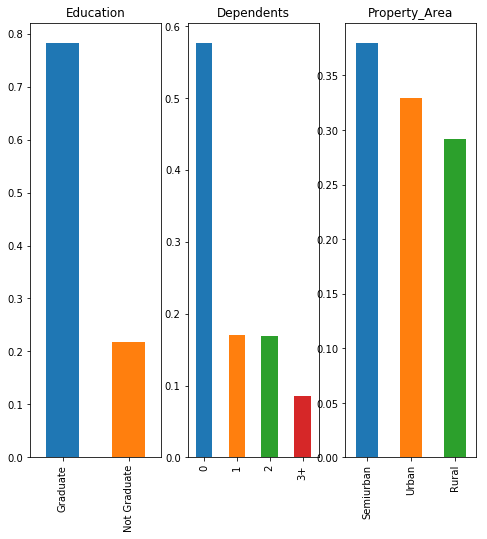

In [38]:
plt.subplot(1,3,1)
train["Education"].value_counts(normalize=True).plot(kind="bar",figsize=(8,8),title="Education")


plt.subplot(1,3,2)
train["Dependents"].value_counts(normalize=True).plot(kind="bar",figsize=(8,8),title="Dependents")


plt.subplot(1,3,3)
train["Property_Area"].value_counts(normalize=True).plot(kind="bar",figsize=(8,8),title="Property_Area")

# numerical variable

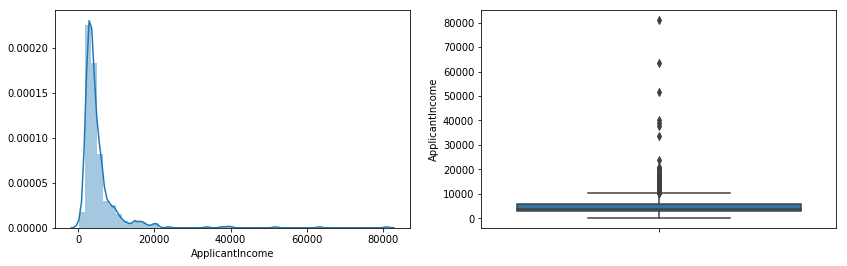

In [63]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(train["ApplicantIncome"])
plt.subplot(1,2,2)
sns.boxplot("ApplicantIncome",data=train,orient="v")

In [64]:
train["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

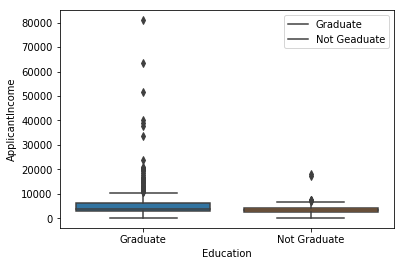

In [80]:
sns.boxplot("Education","ApplicantIncome",data=train)
plt.legend(["Graduate","Not Geaduate"])

#distribution of loan amount

In [ ]:
plt.figure(figsize=(10,8))
df=train.dropna()
plt.subplot(1,2,1)
sns.distplot(df["LoanAmount"])
plt.subplot(1,2,2)
sns.boxplot(df["LoanAmount"],orient="v")

# bivariate plot 

In [ ]:
# to study dependency of target variable on various independent variable

In [9]:
x=pd.crosstab(train["Gender"],train["Loan_Status"])

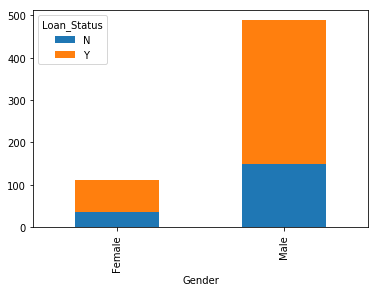

In [10]:
x.plot(kind="bar",stacked=True)

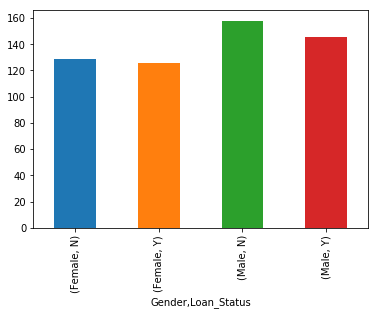

In [22]:
#train.groupby(["Gender","Loan_Status"])["LoanAmount"].mean().plot(kind="bar")

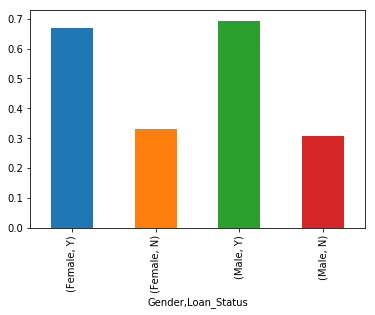

In [26]:
train.groupby("Gender")["Loan_Status"].value_counts(normalize=True).plot(kind="bar")

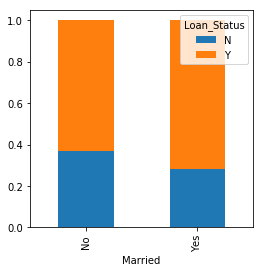

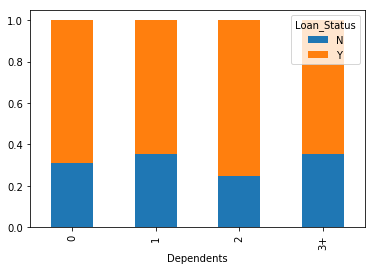

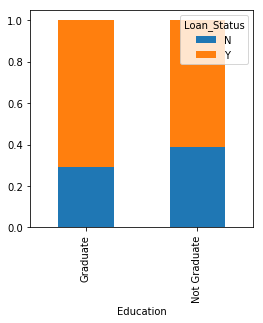

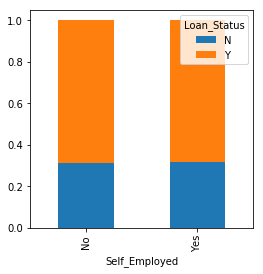

In [31]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

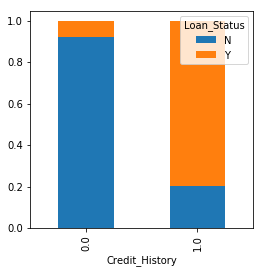

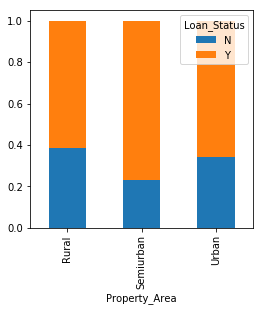

In [37]:
ch=pd.crosstab(train["Credit_History"],train["Loan_Status"])
ch.div(ch.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
area=pd.crosstab(train["Property_Area"],train["Loan_Status"])
area.div(area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [38]:
# It seems people with credit history as 1 are more likely to get their loans approved.
# Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical Independent Variable vs Target Variable

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


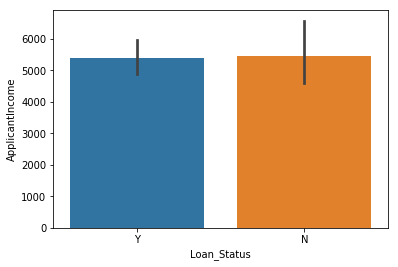

In [40]:
sns.barplot("Loan_Status","ApplicantIncome",data=train)

In [46]:
# we can not see variation in applicant income on loan status lets ceate some beans for variable applicant income

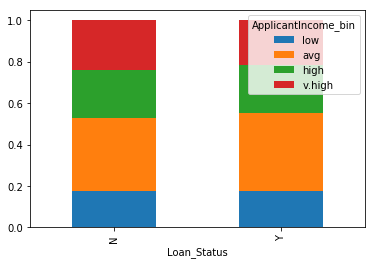

In [54]:
bins=[0,2500,4000,6000,81000]
group=["low","avg","high","v.high"]
train["ApplicantIncome_bin"]=pd.cut(train["ApplicantIncome"],bins,labels=group)
c=pd.crosstab(train["Loan_Status"],train["ApplicantIncome_bin"])
c.div(c.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

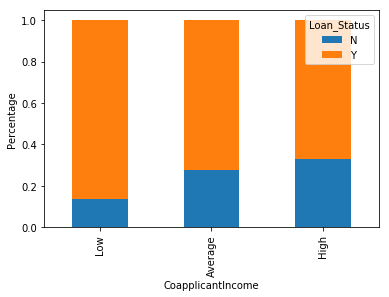

In [57]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

In [58]:
train["total"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [59]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_bin,Coapplicant_Income_bin,total
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,high,NaN,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,high,Average,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,avg,NaN,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,avg,Average,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,high,NaN,6000.0


In [11]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

In [14]:
c=pd.crosstab(train["Total_Income_bin"],train["Loan_Status"])

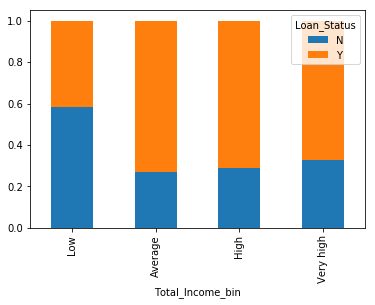

In [15]:
c.div(c.sum(1).astype(float),axis=0).plot(kind="bar",stacked="true")

In [16]:
# lets visualize loan_amount

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


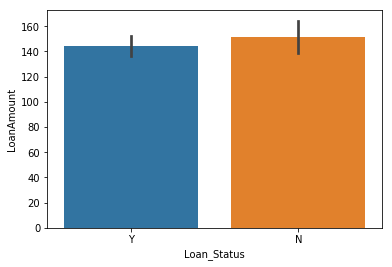

In [18]:
sns.barplot(train["Loan_Status"],train["LoanAmount"])

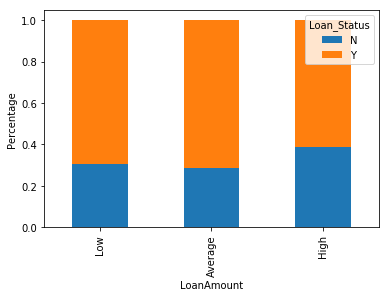

In [28]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [31]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Total_Income_bin', 'loan_amount_bin',
       'LoanAmount_bin'],
      dtype='object')

In [34]:
train=train.drop(['Total_Income', 'Total_Income_bin', 'loan_amount_bin',
       'LoanAmount_bin'],axis=1)

In [35]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
# lets check for corelation between numerical variables

In [37]:
m=train.corr()

In [38]:
m

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


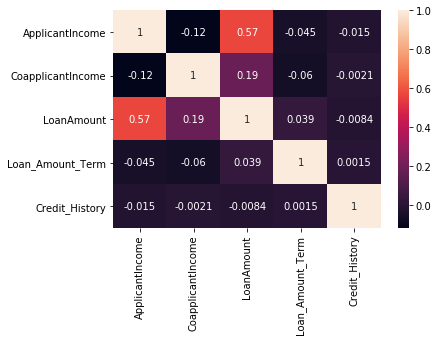

In [40]:
sns.heatmap(m,annot=True)

# Missing value imputation

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)

In [10]:
train["Married"].fillna(train["Married"].mode()[0],inplace=True)

In [11]:
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)

In [12]:
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)

In [13]:
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [14]:
##### lets impute in numerical variable

In [15]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [16]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [17]:
# filled by meadian bcz as we seen earlier that distiribution is not normal and lots of outlier is peresent

In [18]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)  
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [19]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [20]:
train["log_loan_amount"]=np.log(train["LoanAmount"])

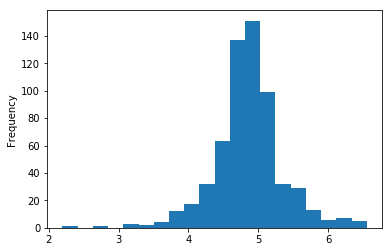

In [21]:
train.log_loan_amount.plot(kind="hist",bins=20)

In [22]:
test["log_loan_amount"]=np.log(test["LoanAmount"])

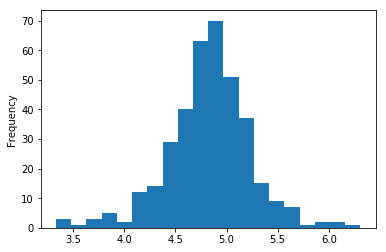

In [23]:
test.log_loan_amount.plot(kind="hist",bins=20)

In [24]:
# model building lets try with logistic regression

In [25]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [26]:
# create dummey variable for catagorical variable

In [27]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [28]:
X=pd.get_dummies(X)

In [29]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_loan_amount,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [30]:
#lets create train and validation data set

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
model.predict(x_cv)

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [34]:
model.score(x_cv,y_cv)

0.7837837837837838

In [35]:
accuracy_score(y_cv,model.predict(x_cv))

0.7837837837837838

In [36]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_cv,model.predict(x_cv))

array([[ 22,  27],
       [  4, 132]], dtype=int64)

In [37]:
test=pd.get_dummies(test)

In [38]:
pred_test = model.predict(test)

In [39]:
# create submisiion file

# lets try some feature engineering 

In [40]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

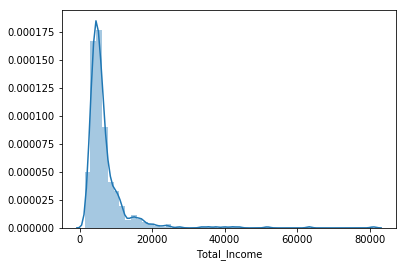

In [41]:
sns.distplot(train["Total_Income"])

In [42]:
## we can see income is right skewed

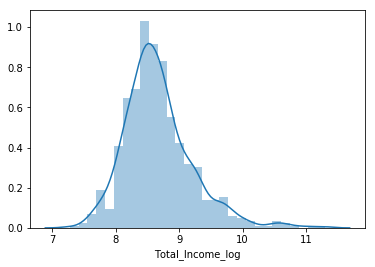

In [43]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [44]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

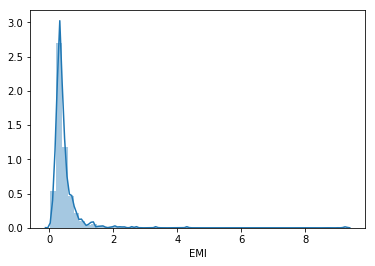

In [45]:
sns.distplot(train["EMI"])

In [46]:
# right skewed

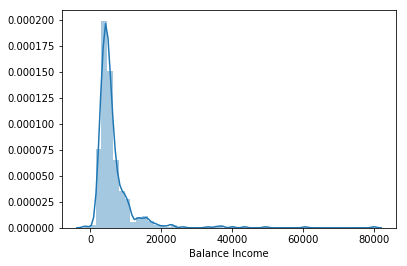

In [47]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

In [48]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [49]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status  

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf=RandomForestClassifier()

In [53]:
rf.fit(x_train,y_train)

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
rf.score(x_cv,y_cv)

0.7297297297297297

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# logistic reg

In [58]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_cv)

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
logmodel.score(x_cv,y_cv)

0.7837837837837838

In [60]:
### ty Xgb classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)

In [64]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=400,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [66]:
clf.score(x_cv,y_cv)

0.7567567567567568

In [67]:
from sklearn.model_selection import GridSearchCV

In [69]:
mod=GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160]})
mod.fit(x_train,y_train)

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [60, 80, 100, 120, 140, 160]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
mod.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              n_iter_no_change=None, presort='auto', random_state=400,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [72]:
clf=GradientBoostingClassifier(n_estimators=160,random_state=400)
clf.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              n_iter_no_change=None, presort='auto', random_state=400,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [75]:
clf.score(x_cv,y_cv)

0.7513513513513513

# summary